<a href="https://colab.research.google.com/github/eunicebalicanta/econ326_research_paper/blob/main/ECON326_FinalPaper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Examining the Impact of Screen Time, Physical Health, and Mental Wellbeing on Youth Sleep Quality

####ECON 326 Final Research Paper
####Solo Advanced Track by Eunice Balicanta


---



**Dataset Description**: Provided by Kaggle, the Healthy Brain Network Dataset is a clinical sample of roughly 5,000 five to twenty-year olds who have undergone research screenings in New York. With rings rates of computer addiction, the goal of the study was to improve the diagnosis and interventions of mental and health and learning disorders. This data includes several measurements including internet usage surveys, bio-electric impedence analysis, physical activity questionnaire, youth demographics, and physical measures.







In [190]:
# Install the packages
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install statsmodels

# Read the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white

In [199]:
# Load the data dictionary
file_dictionary = '/content/drive/MyDrive/ECON 326 Project Code/Final Paper/child-mind-institute-problematic-internet-use (2)/data_dictionary.csv'
data_dicionary = pd.read_csv(file_dictionary)
data_dicionary

,Instrument,Field,Description,Type,Values,Value Labels
0,Identifier,id,Participant's ID,str,NaN,NaN
1,Demographics,Basic_Demos-Enroll_Season,Season of enrollment,str,"Spring, Summer, Fall, Winter",NaN
2,Demographics,Basic_Demos-Age,Age of participant,float,NaN,NaN
3,Demographics,Basic_Demos-Sex,Sex of participant,categorical int,"0,1","0=Male, 1=Female"
4,Children's Global Assessment Scale,CGAS-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
...,...,...,...,...,...,...
76,Sleep Disturbance Scale,SDS-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
77,Sleep Disturbance Scale,SDS-SDS_Total_Raw,Total Raw Score,int,NaN,NaN
78,Sleep Disturbance Scale,SDS-SDS_Total_T,Total T-Score,int,NaN,NaN
79,Internet Use,PreInt_EduHx-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN


In [205]:
# Load the data
file_data = '/content/drive/MyDrive/ECON 326 Project Code/Final Paper/child-mind-institute-problematic-internet-use (2)/train.csv'
data = pd.read_csv(file_data)
data

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,...,1.0,1.0,0.0,32.0,Winter,35.0,50.0,Fall,1.0,1.0
3956,ffa9794a,Winter,10,0,NaN,NaN,Spring,18.764678,53.5,76.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,0.0,NaN
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,...,1.0,0.0,1.0,31.0,Winter,56.0,77.0,Fall,0.0,1.0
3958,ffed1dd5,Spring,13,0,Spring,70.0,Winter,12.235895,70.7,87.0,...,1.0,1.0,1.0,19.0,Spring,33.0,47.0,Spring,1.0,0.0


In [206]:
# Rename columns for better interpretibility
data.rename(columns={
    data.columns[data.columns.get_loc('Basic_Demos-Age')]: 'Age',
    data.columns[data.columns.get_loc('Basic_Demos-Sex')]: 'Sex',
    data.columns[data.columns.get_loc('SDS-SDS_Total_T')]: 'Sleep_Disturbance_Scale',
    data.columns[data.columns.get_loc('PreInt_EduHx-computerinternet_hoursday')]: 'Internet_Usage',
    data.columns[data.columns.get_loc('Fitness_Endurance-Time_Mins')]: 'Fitness_Endurance',
    data.columns[data.columns.get_loc('Physical-BMI')]: 'BMI',
    data.columns[data.columns.get_loc('PCIAT-PCIAT_14')]: 'PCIAT_14',
    data.columns[data.columns.get_loc('PCIAT-PCIAT_16')]: 'PCIAT_16',
      }, inplace=True)

# Filter out unecessary variables and drop missing "NA" values
data = data[(data['Age'] >= 13) & (data['Age'] <= 20)]
data = data[['Age', 'Sex', 'Fitness_Endurance',  'Sleep_Disturbance_Scale', 'Internet_Usage', 'BMI', 'PCIAT_14','PCIAT_16']].dropna()
data

,Age,Sex,Fitness_Endurance,Sleep_Disturbance_Scale,Internet_Usage,BMI,PCIAT_14,PCIAT_16


In [201]:
# Create a table of summary statistics for each variable
summary_stats = data.describe()
summary_stats

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,...,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii
count,3960.000000,3960.000000,2421.000000,3022.000000,3027.000000,3076.000000,898.000000,2954.000000,2967.000000,2954.000000,...,2728.000000,2725.000000,2728.000000,2730.000000,2733.000000,2736.000000,2609.000000,2606.000000,3301.000000,2736.000000
mean,10.433586,0.372727,65.454771,19.331929,55.946713,89.038615,27.278508,69.648951,81.597236,116.983074,...,1.452346,1.627890,1.613636,1.158974,0.943652,27.896199,41.088923,57.763622,1.060588,0.580409
std,3.574648,0.483591,22.341862,5.113934,7.473764,44.569040,5.567287,13.611226,13.665196,17.061225,...,1.495600,1.445622,1.529178,1.343661,1.185460,20.338853,10.427433,13.196091,1.094875,0.771122
min,5.000000,0.000000,25.000000,0.000000,33.000000,0.000000,18.000000,0.000000,27.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,38.000000,0.000000,0.000000
25%,8.000000,0.000000,59.000000,15.869350,50.000000,57.200000,23.000000,61.000000,72.000000,107.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,33.000000,47.000000,0.000000,0.000000
50%,10.000000,0.000000,65.000000,17.937682,55.000000,77.000000,26.000000,68.000000,81.000000,114.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,26.000000,39.000000,55.000000,1.000000,0.000000
75%,13.000000,1.000000,75.000000,21.571244,62.000000,113.800000,30.000000,76.000000,90.500000,125.000000,...,2.000000,3.000000,2.000000,2.000000,1.000000,41.000000,46.000000,64.000000,2.000000,1.000000
max,22.000000,1.000000,999.000000,59.132048,78.500000,315.000000,50.000000,179.000000,138.000000,203.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,93.000000,96.000000,100.000000,3.000000,3.000000


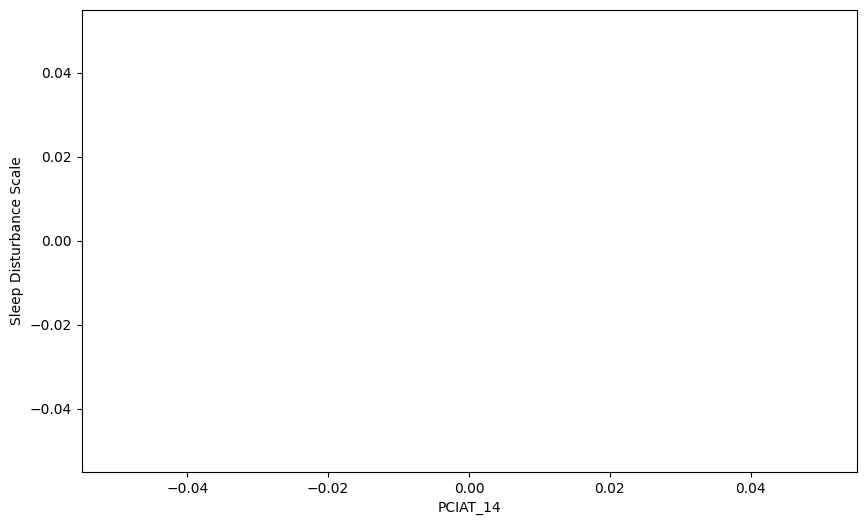

In [203]:
# Scatter plot with Best-Fit Line
plt.figure(figsize=(10, 6))
sns.regplot(x='PCIAT_14', y='Sleep_Disturbance_Scale', data=data, scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})
plt.ylabel("Sleep Disturbance Scale")
plt.show()

In [198]:
# Quantify correlation (-1 to 1)
corr_matrix = data.corr()
print(corr_matrix)

ValueError: could not convert string to float: '00008ff9'

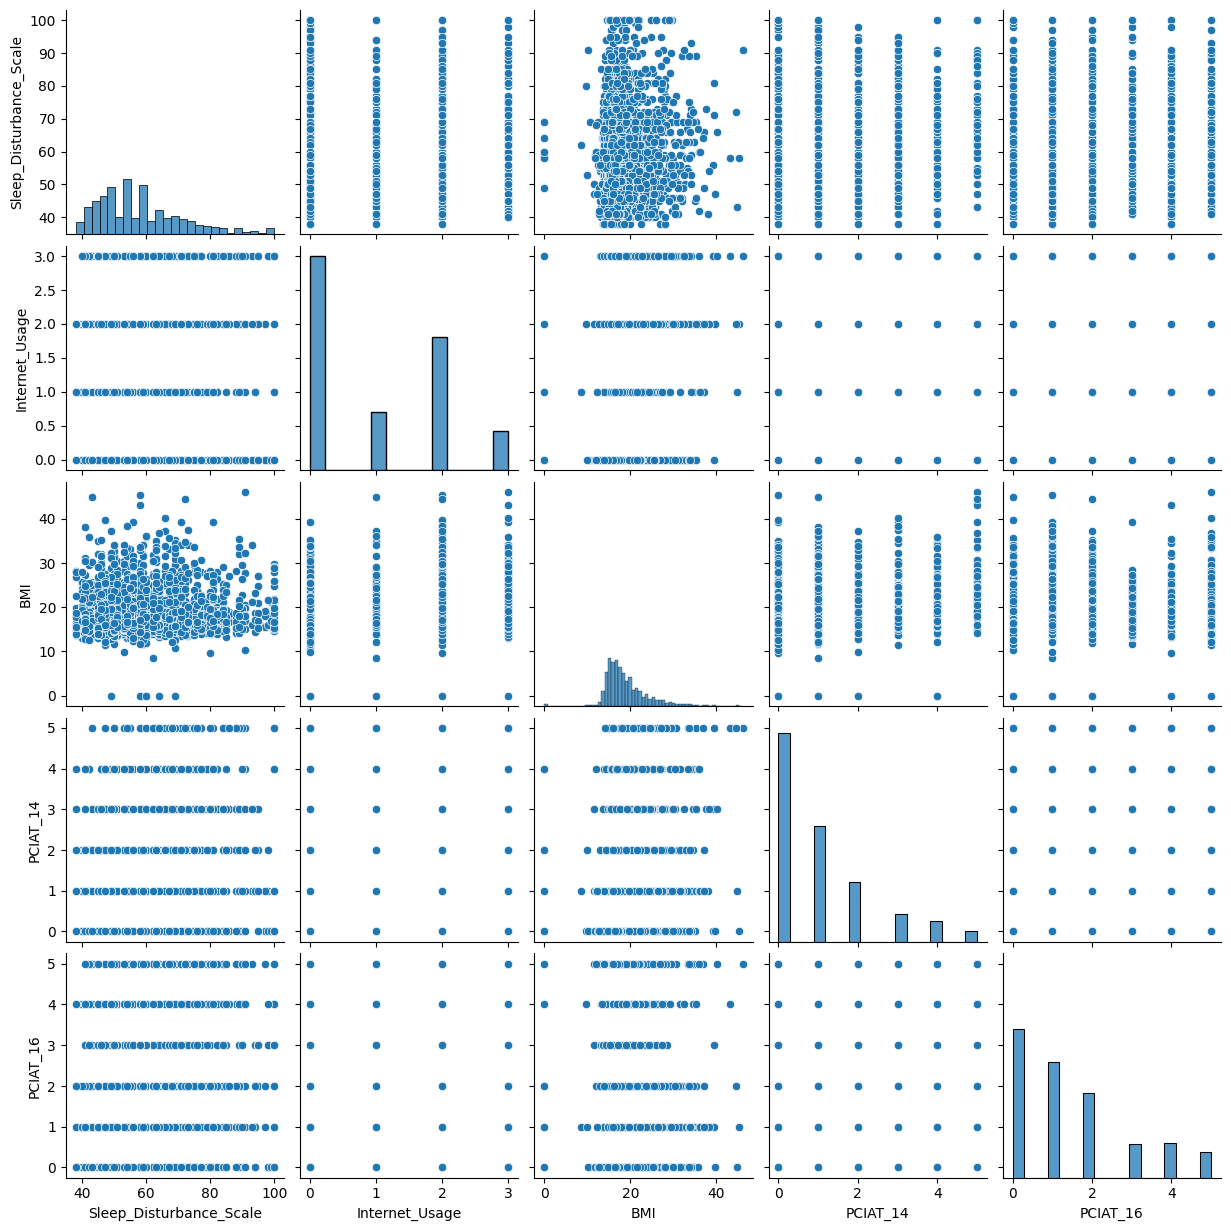

In [ ]:
# Plot correlations
sns.pairplot(data)
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = data[['Internet_Usage', 'Heart_Rate', 'CGAS_Score', 'BMI']]
X = add_constant(X)  # Adds a constant term for VIF calculation
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

         Variable        VIF
0           const  92.330959
1  Internet_Usage   1.078080
2      Heart_Rate   1.001433
3      CGAS_Score   1.018620
4             BMI   1.077790


In [ ]:
import statsmodels.api as sm

# Define independent variables (predictors) and dependent variable (response)
X = data[['Internet_Usage', 'Heart_Rate', 'CGAS_Score', 'BMI']]  # Independent variables
y = data['Sleep_Disturbance_Scale']  # Dependent variable

# Add a constant to the predictors (for the intercept term)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     Sleep_Disturbance_Scale   R-squared:                       0.030
Model:                                 OLS   Adj. R-squared:                  0.028
Method:                      Least Squares   F-statistic:                     15.23
Date:                     Sat, 14 Dec 2024   Prob (F-statistic):           2.84e-12
Time:                             03:59:52   Log-Likelihood:                -7829.1
No. Observations:                     1966   AIC:                         1.567e+04
Df Residuals:                         1961   BIC:                         1.570e+04
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------